In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso,LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
df=pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Checking the shape of the data

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Checking null values

In [ ]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in the dataset

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
for i in df:
  print(i,' ',df[i].nunique())

battery_power   1094
blue   2
clock_speed   26
dual_sim   2
fc   20
four_g   2
int_memory   63
m_dep   10
mobile_wt   121
n_cores   8
pc   21
px_height   1137
px_width   1109
ram   1562
sc_h   15
sc_w   19
talk_time   19
three_g   2
touch_screen   2
wifi   2
price_range   4


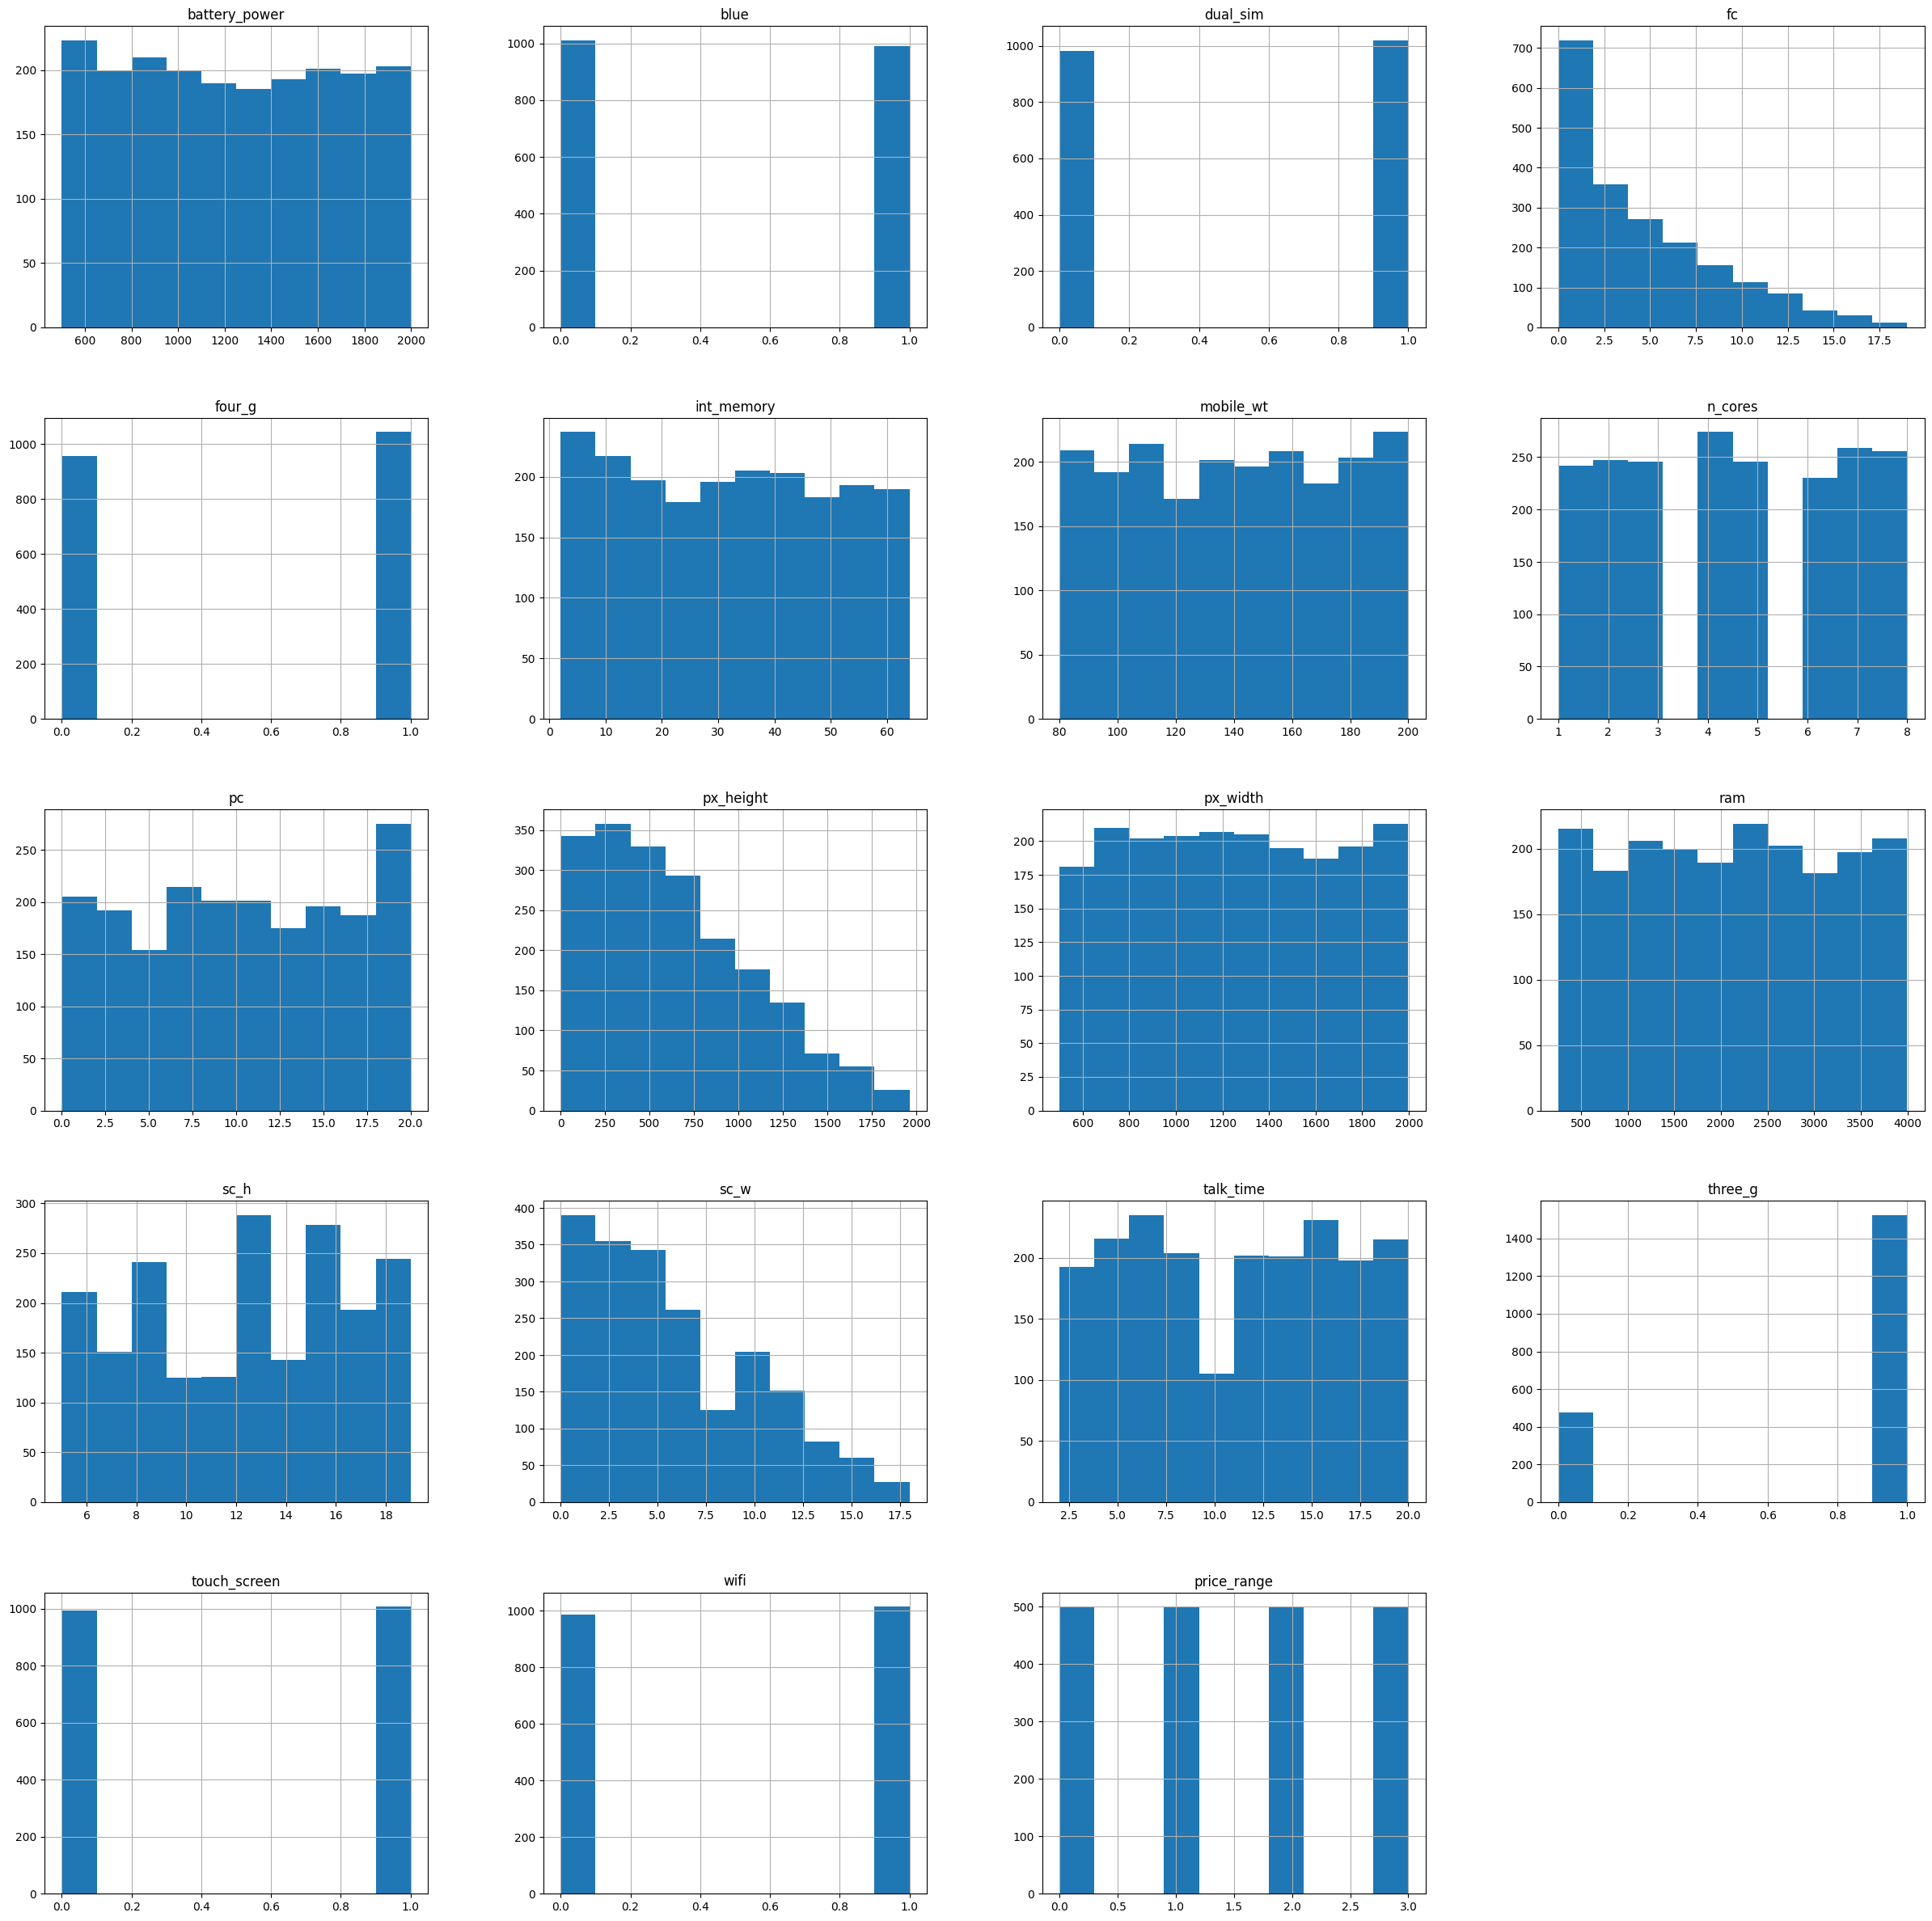

In [ ]:
freqgraph=df.select_dtypes('int','float')
freqgraph.hist(figsize=(30,30))
plt.show()

<Axes: >

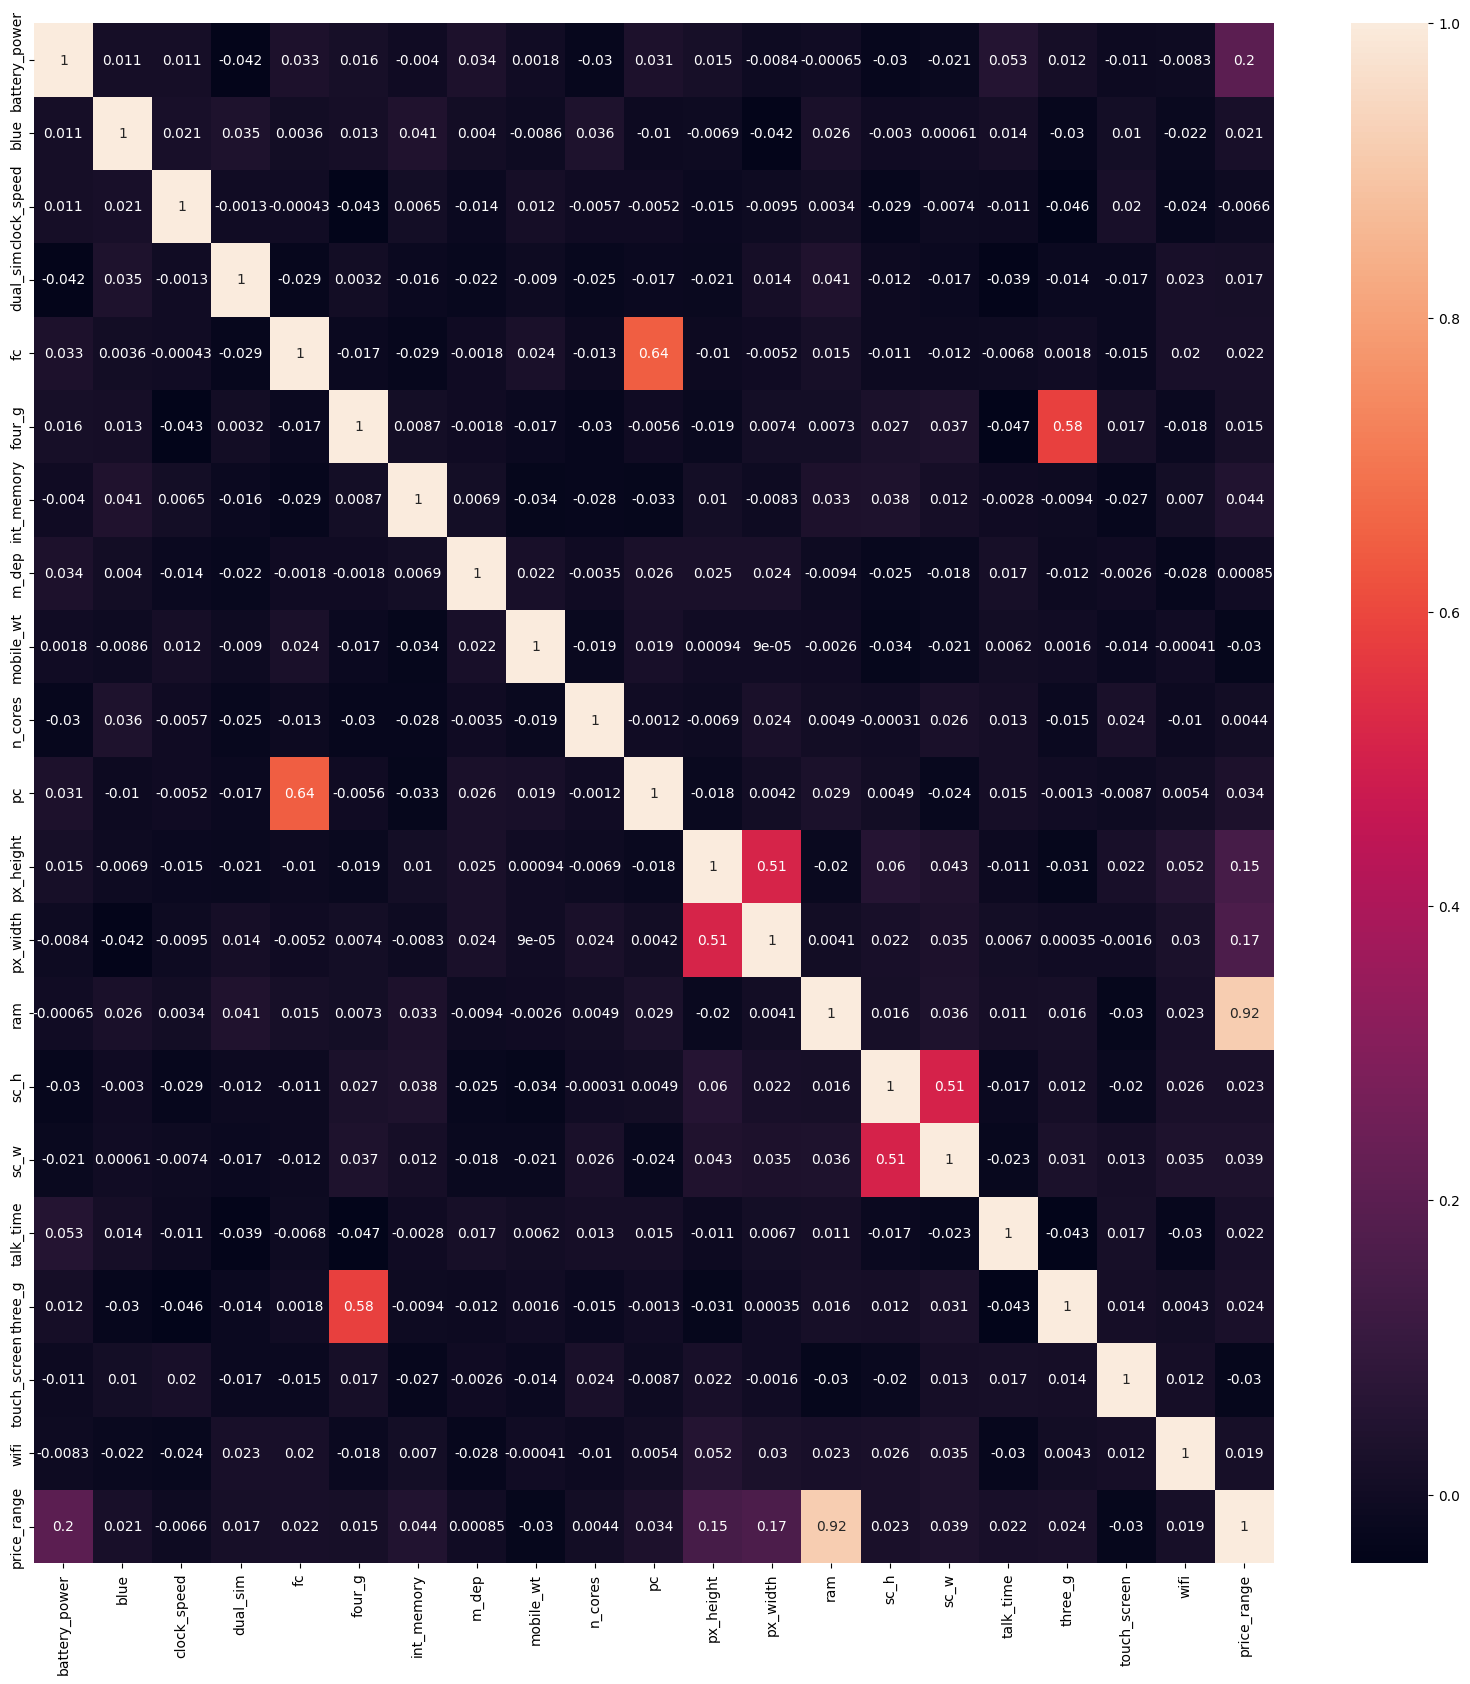

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)

Only ram and price is having strong correlation

Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

There are no duplicate values

Checking the outliers in dataset

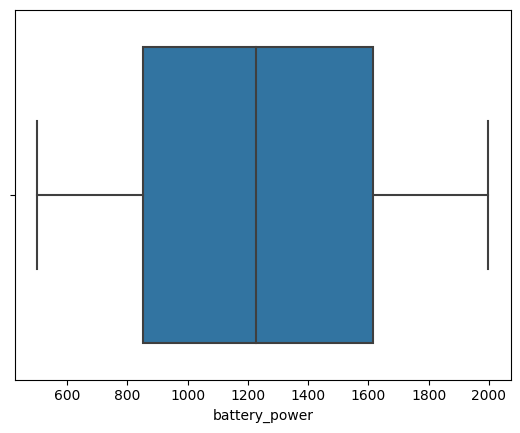

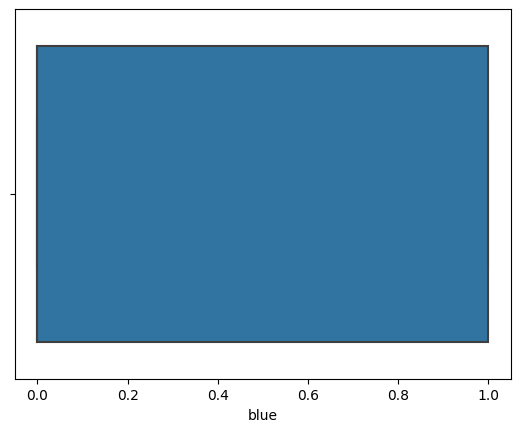

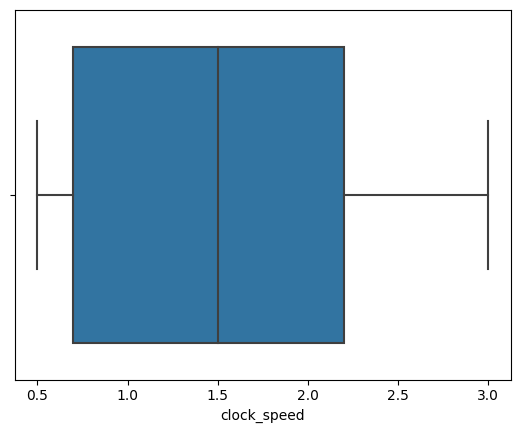

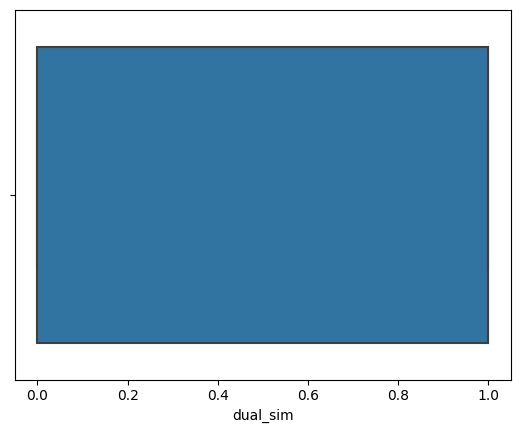

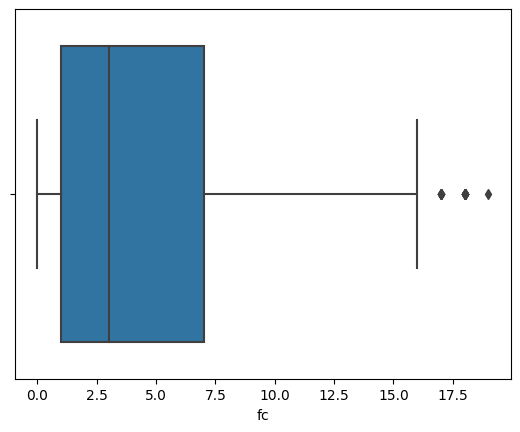

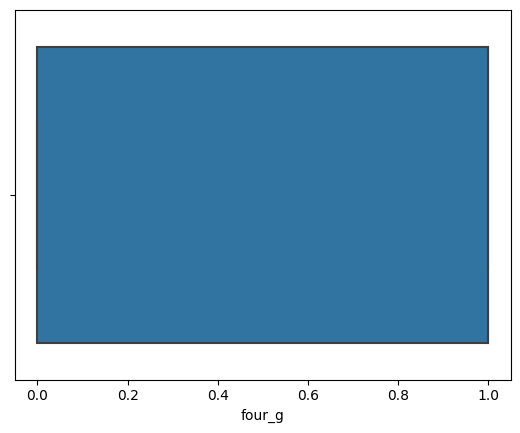

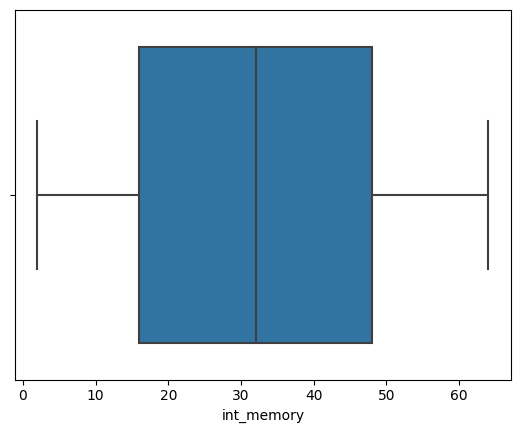

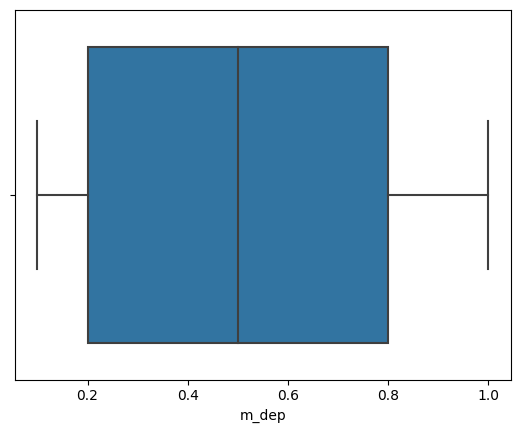

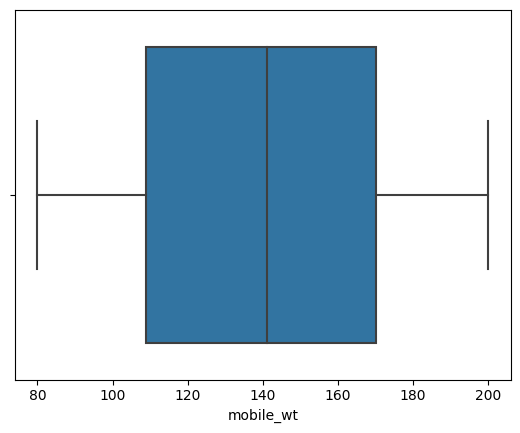

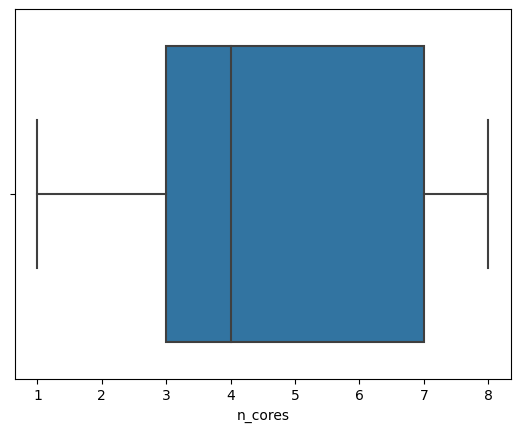

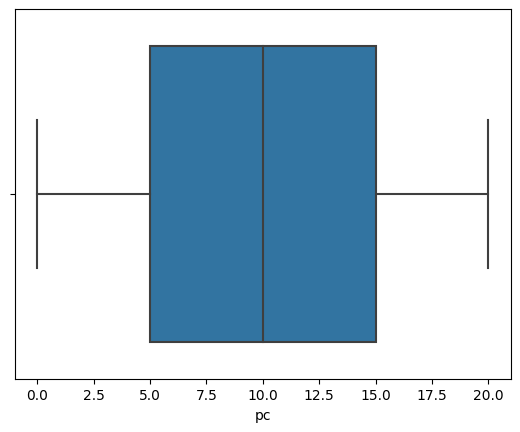

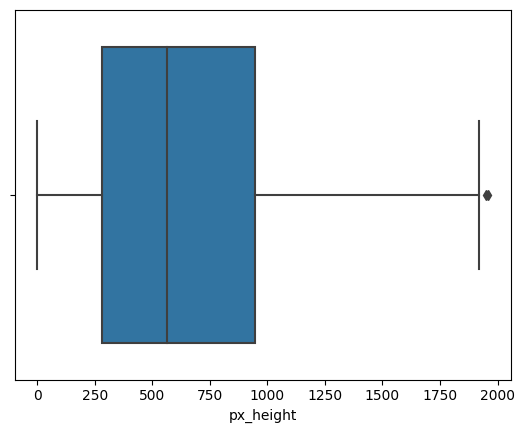

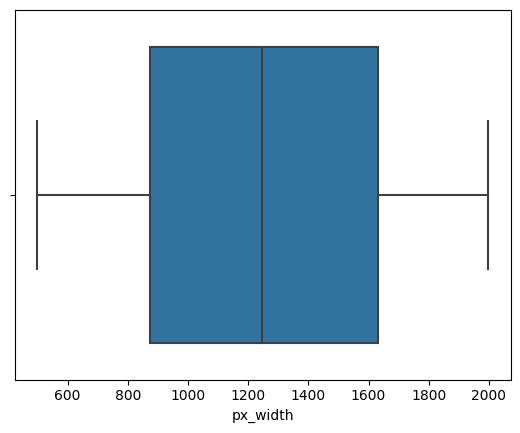

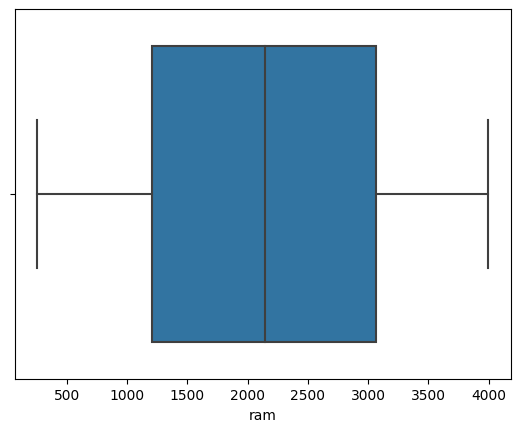

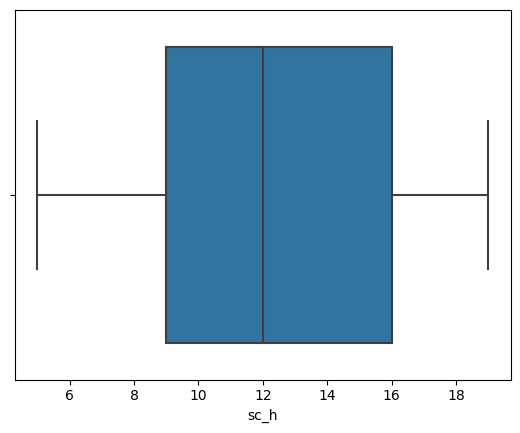

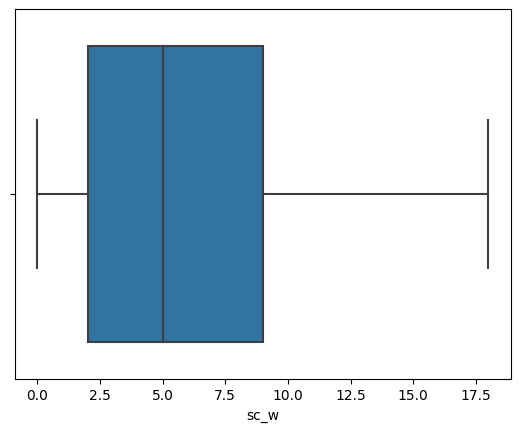

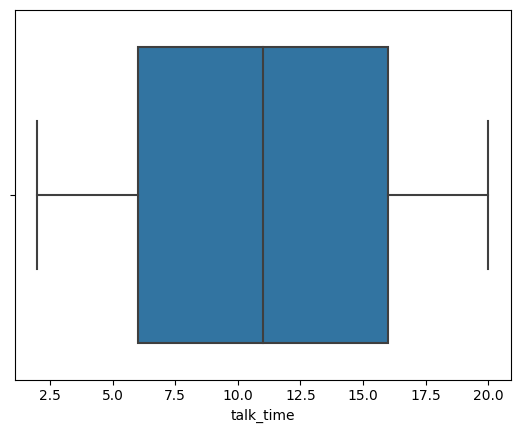

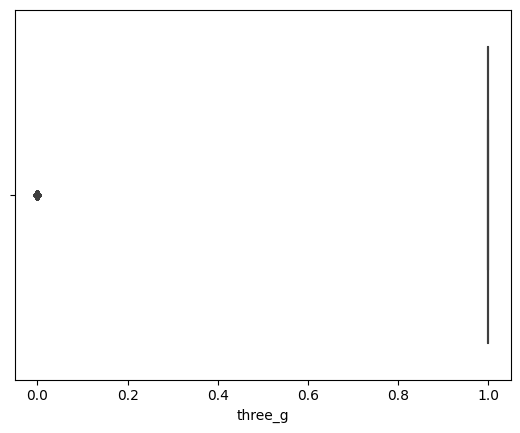

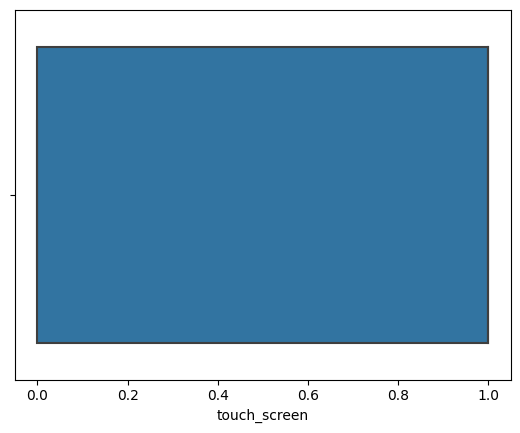

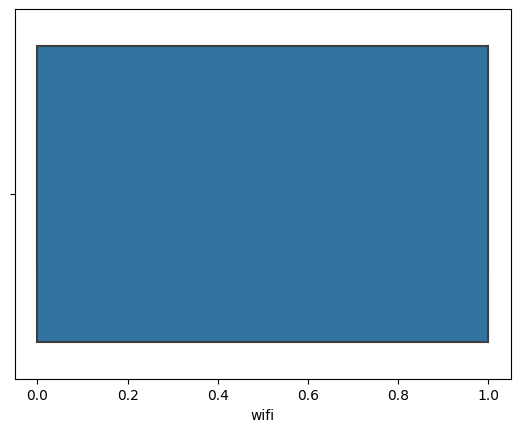

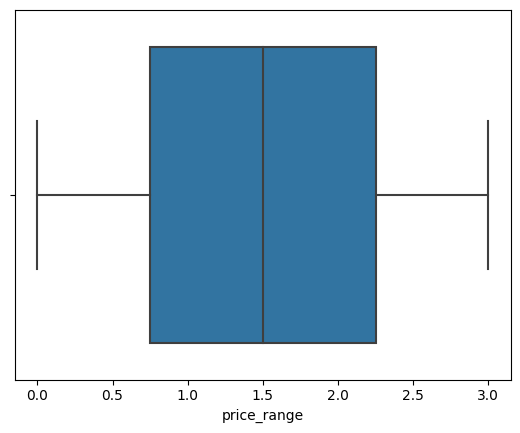

In [ ]:
for i in df:
  sns.boxplot(x=df[i])
  plt.show()

Adding the testing dataset

In [ ]:
df2=pd.read_csv('test.csv')

In [ ]:
df2.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
df2.tail()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


Splitting into dependent and independent variables

Without any scaling of data

In [ ]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=42)

In [ ]:
value= [LinearRegression(),LogisticRegression(), BaggingRegressor(), DecisionTreeRegressor(),ExtraTreesRegressor(),GradientBoostingRegressor(),HistGradientBoostingRegressor()]
key= ['Linear Regression','Logistic Regression', 'Bagging Regression',   'Decision Tree Regression','Extra Trees Regression','Gradient Boosting Regression','Hist Gradient Boosting Regression']

models= dict(zip(key,value))
for key,value in models.items():
    value.fit(x_train,y_train)
    y_pred= value.predict(x_test)
    print('\n',key)
    print('  Mean square error = ',mean_squared_error(y_test,y_pred))
    print('  R2 Score =',r2_score(y_test,y_pred))


 Linear Regression
  Mean square error =  0.10441221351207036
  R2 Score = 0.9166484653902705

 Logistic Regression
  Mean square error =  0.4064285714285714
  R2 Score = 0.6755509341453114


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Bagging Regression
  Mean square error =  0.10069285714285713
  R2 Score = 0.9196176013821873

 Decision Tree Regression
  Mean square error =  0.18428571428571427
  R2 Score = 0.8528860123189637

 Extra Trees Regression
  Mean square error =  0.08240192857142857
  R2 Score = 0.9342191208269337

 Gradient Boosting Regression
  Mean square error =  0.0909016940051256
  R2 Score = 0.9274338179500871

 Hist Gradient Boosting Regression
  Mean square error =  0.08903769006684133
  R2 Score = 0.9289218391647376


Standard Scaler

In [ ]:
std_scaler=StandardScaler()

In [ ]:
x1=std_scaler.fit_transform(x)
x1=pd.DataFrame(x1,columns=x_train.columns)

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y,train_size=0.3,random_state=42)

In [ ]:
value= [LinearRegression(),LogisticRegression(), BaggingRegressor(), DecisionTreeRegressor(),ExtraTreesRegressor(),GradientBoostingRegressor(),HistGradientBoostingRegressor()]
key= ['Linear Regression','Logistic Regression', 'Bagging Regression',   'Decision Tree Regression','Extra Trees Regression','Gradient Boosting Regression','Hist Gradient Boosting Regression']

models= dict(zip(key,value))
for key,value in models.items():
    value.fit(x_train1,y_train1)
    y_pred1= value.predict(x_test1)
    print('\n',key)
    print('  Mean square error = ',mean_squared_error(y_test1,y_pred1))
    print('  R2 Score =',r2_score(y_test1,y_pred1))


 Linear Regression
  Mean square error =  0.10441221351207028
  R2 Score = 0.9166484653902705

 Logistic Regression
  Mean square error =  0.06857142857142857
  R2 Score = 0.9452599115605447

 Bagging Regression
  Mean square error =  0.10503571428571429
  R2 Score = 0.916150729114355

 Decision Tree Regression
  Mean square error =  0.18285714285714286
  R2 Score = 0.854026430828119

 Extra Trees Regression
  Mean square error =  0.079358
  R2 Score = 0.9366490675653165

 Gradient Boosting Regression
  Mean square error =  0.09104112492587435
  R2 Score = 0.9273225112281478

 Hist Gradient Boosting Regression
  Mean square error =  0.08907130231308315
  R2 Score = 0.9288950067453137


Min Max Scaler

In [ ]:
min_scaler=MinMaxScaler()
x2=min_scaler.fit_transform(x)
x2=pd.DataFrame(x2,columns=x.columns)
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y,train_size=0.3,random_state=42)

In [ ]:
value= [LinearRegression(),LogisticRegression(), BaggingRegressor(), DecisionTreeRegressor(),ExtraTreesRegressor(),GradientBoostingRegressor(),HistGradientBoostingRegressor()]
key= ['Linear Regression','Logistic Regression', 'Bagging Regression',   'Decision Tree Regression','Extra Trees Regression','Gradient Boosting Regression','Hist Gradient Boosting Regression']

models= dict(zip(key,value))
for key,value in models.items():
    value.fit(x_train2,y_train2)
    y_pred2= value.predict(x_test2)
    print('\n',key)
    print('  Mean square error = ',mean_squared_error(y_test2,y_pred2))
    print('  R2 Score =',r2_score(y_test2,y_pred2))


 Linear Regression
  Mean square error =  0.10441221351207025
  R2 Score = 0.9166484653902705

 Logistic Regression
  Mean square error =  0.16214285714285714
  R2 Score = 0.8705624992108711

 Bagging Regression
  Mean square error =  0.10019285714285713
  R2 Score = 0.9200167478603916

 Decision Tree Regression
  Mean square error =  0.18571428571428572
  R2 Score = 0.8517455938098084

 Extra Trees Regression
  Mean square error =  0.0819655
  R2 Score = 0.9345675186814807

 Gradient Boosting Regression
  Mean square error =  0.09088910144402923
  R2 Score = 0.9274438705029134

 Hist Gradient Boosting Regression
  Mean square error =  0.08903837698935502
  R2 Score = 0.9289212907993333


Highest R2 score with Logistic Regression after Standard Scaling (0.945)

Testing the model with the test dataset

In [ ]:
x2=std_scaler.fit_transform(df2)
x2=pd.DataFrame(x2,columns=df2.columns)

In [ ]:
x2.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-1.730320,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,-1.487247,1.535535,...,0.976026,-0.926990,0.391912,1.229373,0.001158,0.397363,-1.653355,-1.760216,1.0,-1.014099
1,-1.726856,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.006341,1.478120,...,0.319433,0.274729,-0.871028,1.614643,-1.388231,-1.254383,-0.743418,0.568112,-1.0,-1.014099
2,-1.723391,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.362567,1.334582,...,-0.993754,1.485693,0.287236,0.236313,1.158982,1.105254,-0.197456,-1.760216,1.0,0.986097
3,-1.719927,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-0.062340,-1.249091,...,1.632619,-0.767532,1.165604,1.612804,-0.461972,-1.254383,-0.743418,0.568112,1.0,-1.014099
4,-1.716463,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.062340,-0.904602,...,1.304323,0.281662,-0.977979,-0.336535,0.695852,0.633326,-0.743418,0.568112,-1.0,0.986097


Droppin the ID from the dataset

In [ ]:
x2=x2.drop('id',axis=1)

In [ ]:
LR=LogisticRegression()
LR=LR.fit(x_train1,y_train2)
y_test=LR.predict(x2)

Checking the result

In [ ]:
print(y_test)

[2 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 1 1 3 1 1 3 0 2 0 3 0 3 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 3 0 1 0 1 2 3 1 2 1 2 2 3
 3 0 2 0 1 3 0 3 3 0 3 0 3 1 3 0 1 1 2 1 2 1 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 3 2 0 2 2 1 3 1 1 0 3 2 1 2 1 3 2 3 3 2
 2 3 2 3 1 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 0 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 1 3 2 0 2 2 3 3 1 2 2 3 3 2 1 1 0 0 1 2 0 2 2 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 1 2 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 1 3 0 0 3 1 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 1 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 1 2 2 3 3 0 3 0 3 1 3 1 3 3 0 2 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 3 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 1 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 0 1 0 3 3 3 3 1 3 1 2 1 2 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 2 0 2 3 3 0 3 0 2 3 3 3 0 2 0 2 3 0 1 1 0 0 1
 2 1 3 3 3 2 3 1 2 2 3 3 

Converting the array to Dataframe

In [ ]:
df3=pd.DataFrame(y_test, columns =['Price'])

Checking the dataframe

In [ ]:
df3.head()

,Price
0,2
1,3
2,2
3,3
4,1


In [ ]:
df3.shape

(1000, 1)

Adding the result with the test dataset

In [ ]:
df2['Price']=df3['Price']

In [ ]:
df2.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Price
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,2
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
